# 1. Introduction to Perceptron Algorithm

- Consider a situation, we are decsiding on whether to admit a student or not
- We have two pieces of information: test marks and grades in high school

- Student above the line gts accepted and student below the line gets rejected
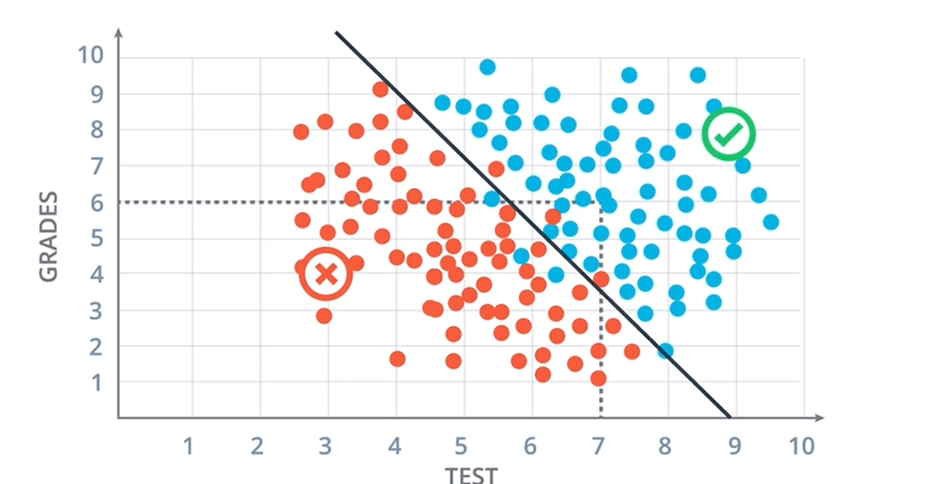

# 2. Linear Boundaries

- Boundary line equation: 2x1 + x2 - 18  = 0 (In other words, Score = 2*Test + Grades  - 18)
    - If Score > 0, then Accept
    - If Score < 0, then Reject
- This linear equation is called 'Model'

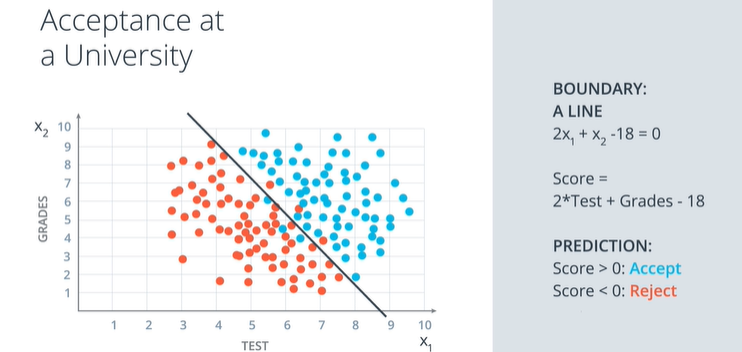

### Generalizing,
- Boundary line equation: w1x1 + w2x2 + b = 0
- We have, Wx + b = 0
    - W = (w1, w2)
    - x = (x1, x2)
    - y = labels = 0 or 1
- Prediction:
    - $\hat{y} = 1 \\  if \ Wx + b >= 0$
    - $\hat{y} = 0 \\ if \ Wx + b < 0$
- Note:
    - Points above the line have $\hat{y}$ >= 0
    - Points below the line have $\hat{y}$ < 0

# 3. Higher Dimensions

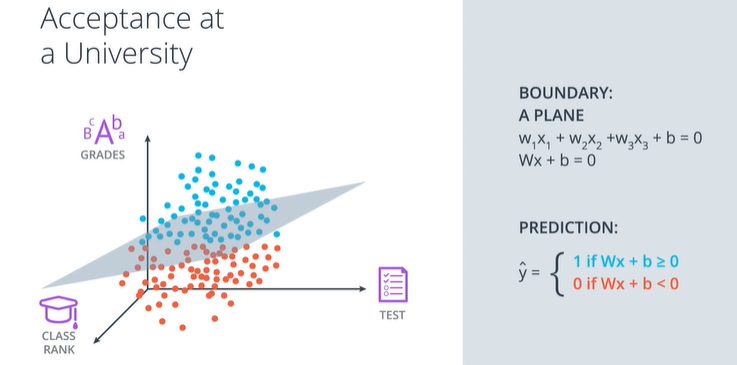

### Generalizing for n - dimensional,
- Boundary line equation: w1x1 + w2x2 + .... + wnxn + b = 0
- We have, Wx + b = 0
    - W = (w1, w2, w3, ... , wn)
    - x = (x1, x2, x3, ...., xn)
    - y = labels = 0 or 1
- Prediction:
    - $\hat{y} = 1 \\  if \ Wx + b >= 0$
    - $\hat{y} = 0 \\ if \ Wx + b < 0$
- Note:
    - Points above the line have $\hat{y}$ >= 0
    - Points below the line have $\hat{y}$ < 0

### What would the dimensions be for input features (x), the weights (W), and the bias (b) to satisfy (Wx + b)?
- W is  1xn
- x is  nx1
- b is  1x1

# 4. Perceptrons

- Perceptron Algorithm encodes the equation into a simple graph
- Perceptron plots the point and check if that lies in the positive or negative area and makes the prediction accordingly

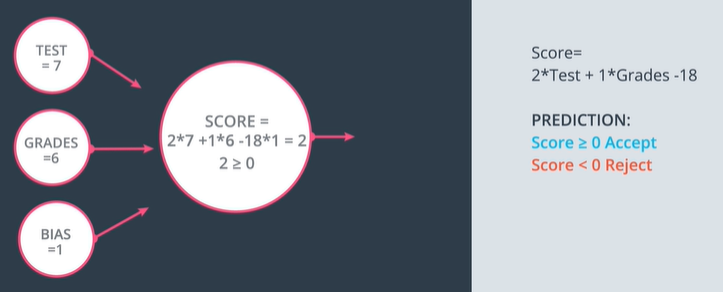

### Generalizing,

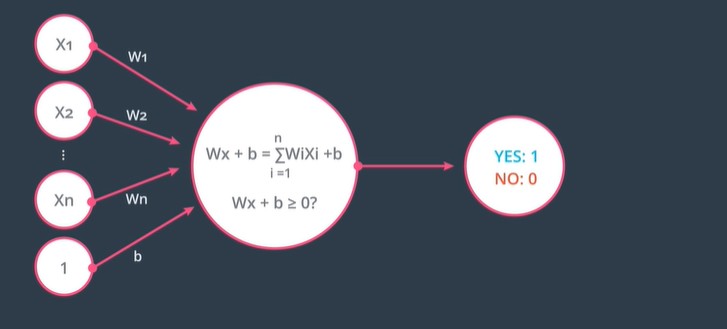

# 5. Perceptrons as Logical Operators

### 1. AND Perceptron
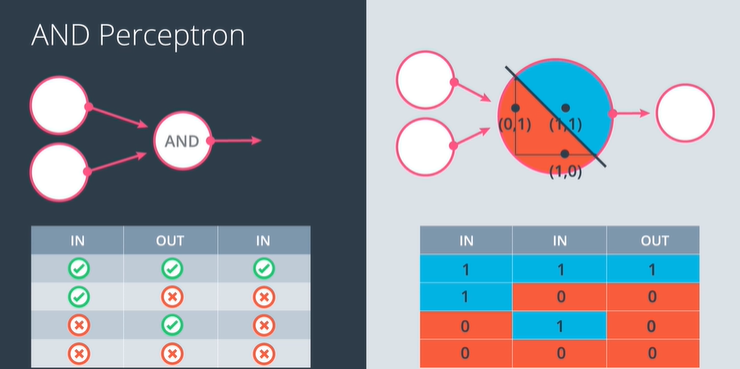

### 2. OR Perceptron
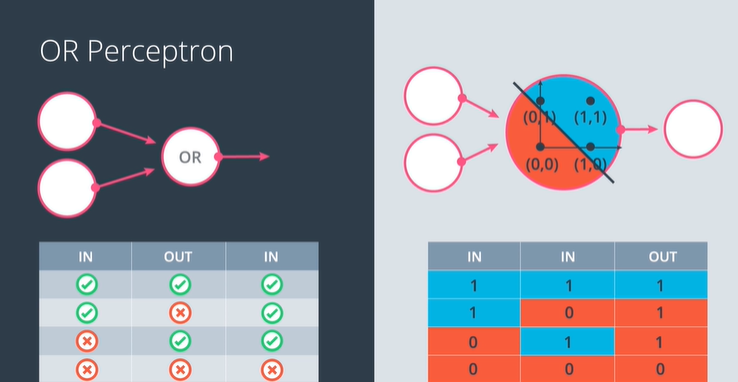

### 3. NOT Perceptron
- Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a 0 if the input is 1 and a 1 if it's a 0. The other inputs to the perceptron are ignored

### 4. XOR Perceptron
- the NOT operation returns True if exactly one of the input is True and other one is False
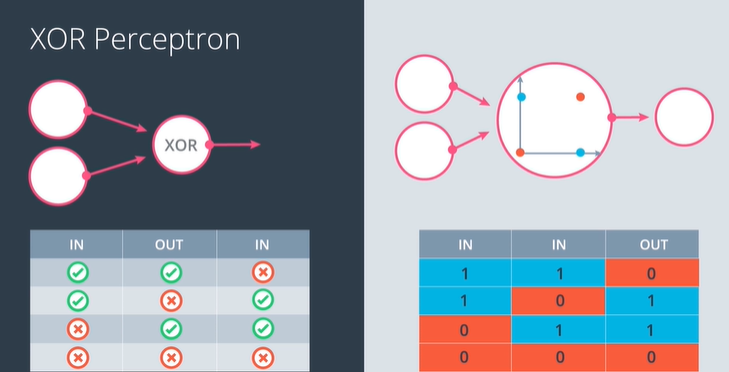

# 6. Perceptron Trick

- Misclassified points would ask the line to 'Come Closer', whereas correctly classified points would say 'I'm good'

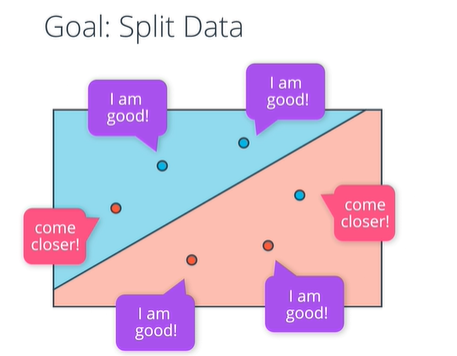

-  $W_i$ should be updated to $W_i = W_i + \alpha x_i$
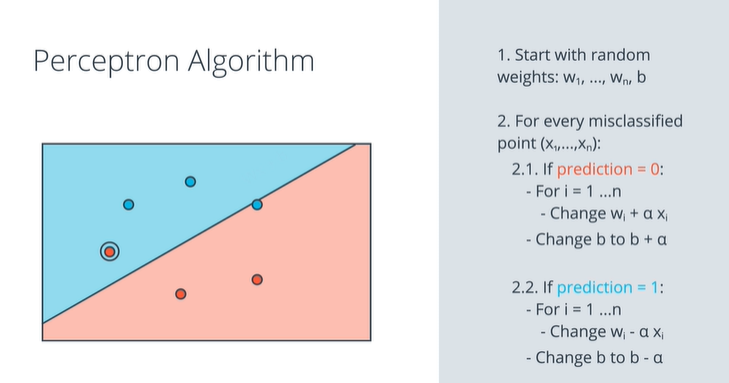

- For positive point in the negative area (Predition was 0): Update the weights by adding
- For negative point in the positive area (Prediction was 1): Update the weights by substracting

### How the Algorithm works?
- For a point with coordinates $(p,q)$, label $y$, and prediction given by the equation $\hat{y} = step(w_1x_1 + w_2x_2 + b)$:
    - If the point is correctly classified, do nothing.
    - If the point is classified positive, but it has a negative label, subtract $\alpha p$, $\alpha q$ and $\alpha$ from $w_1$, $w_2$, $w$, and $b$ respectively.
    - If the point is classified negative, but it has a positive label, add $\alpha p$, $\alpha q$ and $\alpha$ to $w_1$, $w_2$, and $b$ respectively

In [5]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# Implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines